# 机器学习工程师纳米学位
## 模型评价与验证
## 项目 1: 预测波士顿房价


欢迎来到机器学习工程师纳米学位的第一个项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能来让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的内容中有需要你必须实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**'TODO'**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。你的项目将会根据你对问题的回答和撰写代码所实现的功能来进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始
在这个项目中，你将利用马萨诸塞州波士顿郊区的房屋信息数据训练和测试一个模型，并对模型的性能和预测能力进行测试。通过该数据训练后的好的模型可以被用来对房屋做特定预测---尤其是对房屋的价值。对于房地产经纪等人的日常工作来说，这样的预测模型被证明非常有价值。

此项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Housing)。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋14种特征的信息。本项目对原始数据集做了以下处理：
- 有16个`'MEDV'` 值为50.0的数据点被移除。 这很可能是由于这些数据点包含**遗失**或**看不到的值**。
- 有1个数据点的 `'RM'` 值为8.78. 这是一个异常值，已经被移除。
- 对于本项目，房屋的`'RM'`， `'LSTAT'`，`'PTRATIO'`以及`'MEDV'`特征是必要的，其余不相关特征已经被移除。
- `'MEDV'`特征的值已经过必要的数学转换，可以反映35年来市场的通货膨胀效应。

运行下面区域的代码以载入波士顿房屋数据集，以及一些此项目所需的Python库。如果成功返回数据集的大小，表示数据集已载入成功。

In [1]:
# Import libraries necessary for this project
# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Pretty display for notebooks
# 让结果在notebook中显示
%matplotlib inline

# Load the Boston housing dataset
# 载入波士顿房屋的数据集
housing_csv = r'C:\Users\Administrator\Desktop\data analysis\boston_housing-master\housing.csv'
data = pd.read_csv(housing_csv)
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
# 完成
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## 分析数据
在项目的第一个部分，你会对波士顿房地产数据进行初步的观察并给出你的分析。通过对数据的探索来熟悉数据可以让你更好地理解和解释你的结果。

由于这个项目的最终目标是建立一个预测房屋价值的模型，我们需要将数据集分为**特征(features)**和**目标变量(target variable)**。**特征** `'RM'`， `'LSTAT'`，和 `'PTRATIO'`，给我们提供了每个数据点的数量相关的信息。**目标变量**：` 'MEDV'`，是我们希望预测的变量。他们分别被存在`features`和`prices`两个变量名中。

## 练习：基础统计运算
你的第一个编程练习是计算有关波士顿房价的描述统计数据。我们已为你导入了` numpy `，你需要使用这个库来执行必要的计算。这些统计数据对于分析模型的预测结果非常重要的。
在下面的代码中，你要做的是：
- 计算`prices`中的`'MEDV'`的最小值、最大值、均值、中值和标准差；
- 将运算结果储存在相应的变量中。

In [2]:
# TODO: Minimum price of the data
#目标：计算价值的最小值
minimum_price = np.min(data['MEDV'])

# TODO: Maximum price of the data
#目标：计算价值的最大值
maximum_price = np.max(data['MEDV'])

# TODO: Mean price of the data
#目标：计算价值的平均值
mean_price = np.mean(data['MEDV'])

# TODO: Median price of the data
#目标：计算价值的中值
median_price = np.median(data['MEDV'])

# TODO: Standard deviation of prices of the data
#目标：计算价值的标准差
std_price = np.std(data['MEDV'])

# Show the calculated statistics
#目标：输出计算的结果
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### 问题1 - 特征观察

如前文所述，本项目中我们关注的是其中三个值:`'RM'`、`'LSTAT'` 和`'PTRATIO'`，对每一个数据点:
- `'RM'` 是该地区中每个房屋的平均房间数量；
- `'LSTAT'` 是指该地区有多少百分比的房东属于是低收入阶层（有工作但收入微薄）；
- `'PTRATIO'` 是该地区的中学和小学里，学生和老师的数目比（`学生/老师`）。

_凭直觉，上述三个特征中对每一个来说，你认为增大该特征的数值，`'MEDV'`的值会是**增大**还是**减小**呢？每一个答案都需要你给出理由。_

**提示：**你预期一个`'RM'` 值是6的房屋跟`'RM'` 值是7的房屋相比，价值更高还是更低呢？

**回答: **
对于RM：RM增大，MEDV增大。对于房子来说，房间越多，房子面积要响应的增大，价格越高。
对于LSTAT：LSTAT增大，MEDV降低。LSTAT增大，说明这个地区的低收入阶层增加，同时消费水平降低，该地区商业就相比落后，房子价格降低。
对于PTRATIO：PTRATIO增大，MEDV降低。PTRATIO增大，证明该地区学生增加或者老师减少，教育水平相对比较落后，来此地定居的人就较少，房子价格降低。

## 建模
在项目的第二部分中，你需要了解必要的工具和技巧来让你的模型进行预测。用这些工具和技巧对每一个模型的表现做精确的衡量可以极大地增强你预测的信心。

### 练习：定义衡量标准
如果不能对模型的训练和测试的表现进行量化地评估，我们就很难衡量模型的好坏。通常我们会定义一些衡量标准，这些标准可以通过对某些误差或者拟合程度的计算来得到。在这个项目中，你将通过运算[*决定系数*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination) R<sup>2</sup> 来量化模型的表现。模型的决定系数是回归分析中十分常用的统计信息，经常被当作衡量模型预测能力好坏的标准。

R<sup>2</sup>的数值范围从0至1，表示**目标变量**的预测值和实际值之间的相关程度平方的百分比。一个模型的R<sup>2</sup> 值为0还不如直接用**平均值**来预测效果好；而一个R<sup>2</sup> 值为1的模型则可以对目标变量进行完美的预测。从0至1之间的数值，则表示该模型中目标变量中有百分之多少能够用**特征**来解释。_模型也可能出现负值的R<sup>2</sup>，这种情况下模型所做预测有时会比直接计算目标变量的平均值差很多。_

在下方代码的 `performance_metric` 函数中，你要实现：
- 使用 `sklearn.metrics` 中的 `r2_score` 来计算 `y_true` 和 `y_predict`的R<sup>2</sup>值，作为对其表现的评判。
- 将他们的表现评分储存到`score`变量中。

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
        
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### 问题2 - 拟合程度

假设一个数据集有五个数据且一个模型做出下列目标变量的预测：

| 真实数值 | 预测数值 |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*你觉得这个模型已成功地描述了目标变量的变化吗？如果成功，请解释为什么，如果没有，也请给出原因。*  

运行下方的代码，使用`performance_metric`函数来计算模型的决定系数。

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**回答:**
这个模型已成功地描述了目标变量的变化。
有上可以得出R^2 = 0.923，由可以看出预测数值解释了92.3%的真实数值的变化程度，R2取值在0到1之间，越接近1，表明方程中X对Y的解释能力越强，因此这个模型已成功地描述了目标变量的变化

### 练习: 数据分割与重排
接下来，你需要把波士顿房屋数据集分成训练和测试两个子集。通常在这个过程中，数据也会被重新排序，以消除数据集中由于排序而产生的偏差。
在下面的代码中，你需要：
- 使用 `sklearn.model_selection` 中的 `train_test_split`， 将`features`和`prices`的数据都分成用于训练的数据子集和用于测试的数据子集。
  - 分割比例为：80%的数据用于训练，20%用于测试；
  - 选定一个数值以设定 `train_test_split` 中的 `random_state` ，这会确保结果的一致性；
- 最终分离出的子集为`X_train`,`X_test`,`y_train`,和`y_test`。

In [5]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state=0)

# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


### 问题 3- 训练及测试
*将数据集按一定比例分为训练用的数据集和测试用的数据集对学习算法有什么好处？如果用模型已经见过的数据，例如部分训练集数据进行测试，又有什么坏处？*

**提示：** 如果没有数据来对模型进行测试，会出现什么问题？

**答案: **
将数据集按一定比例分为训练用的数据集和测试用的数据集，可以用测试集来验证训练集得出的结果是否正确。如果没有测试集，当我们学习完之后，没有办法验证学习算法是否正确，得出的结果是否合理。如果用部分训练集来测试学习算法，应为训练集学习算法已经见过，则得出的结果是正确结果，不能用来测试。

----

## 分析模型的表现
在项目的第三部分，我们来看一下几个模型针对不同的数据集在学习和测试上的表现。另外，你需要专注于一个特定的算法，用全部训练集训练时，提高它的`'max_depth'` 参数，观察这一参数的变化如何影响模型的表现。把你模型的表现画出来对于分析过程十分有益。可视化可以让我们看到一些单看结果看不到的行为。

### 学习曲线
下方区域内的代码会输出四幅图像，它们是一个决策树模型在不同最大深度下的表现。每一条曲线都直观的显示了随着训练数据量的增加，模型学习曲线的训练评分和测试评分的变化。注意，曲线的阴影区域代表的是该曲线的不确定性（用标准差衡量）。这个模型的训练和测试部分都使用决定系数R<sup>2</sup>来评分。

运行下方区域中的代码，并利用输出的图形回答下面的问题。

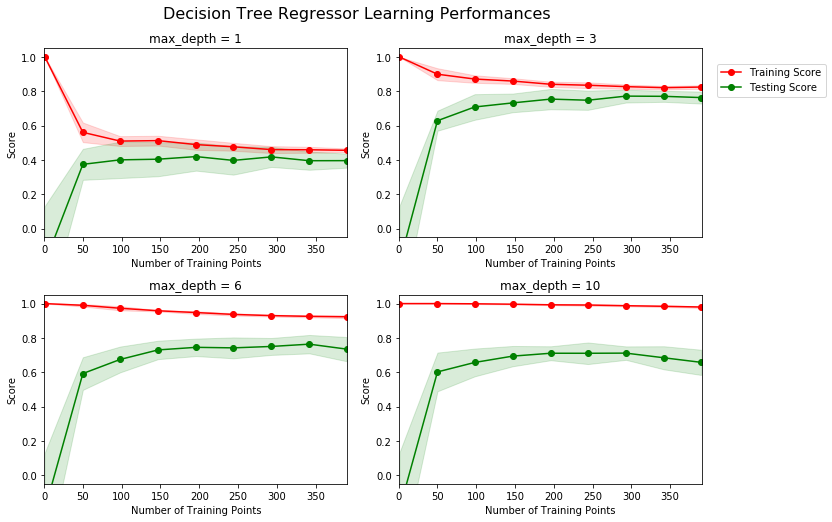

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### 问题 4 - 学习数据
*选择上述图像中的其中一个，并给出其最大深度。随着训练数据量的增加，训练曲线的评分有怎样的变化？测试曲线呢？如果有更多的训练数据，是否能有效提升模型的表现呢？*
**提示：**学习曲线的评分是否最终会收敛到特定的值？

**答案: **
由上图max_depth=3的时候，我们可以看出随着训练数据的增加，训练评分开始降低，当训练数据达到250的时候，训练评分趋于平缓。测试曲线随着训练数据的增加刚开始是越来越高（0-200），当数据超过200的时候测试曲线越来越平缓，甚至在250的时候有点降低。如果有更多的训练数据，不一定能有效提升模型的表现。有max_depth=3的时候我们可以看出，刚开始数据从0-200的时候，训练曲线越来越低，测试曲线越来越高，但是此时再增加数据，测试曲线与训练曲线都趋于平缓，评分没有很大的改变。

### 复杂度曲线
下列代码内的区域会输出一幅图像，它展示了一个已经经过训练和验证的决策树模型在不同最大深度条件下的表现。这个图形将包含两条曲线，一个是训练的变化，一个是测试的变化。跟**学习曲线**相似，阴影区域代表该曲线的不确定性，模型训练和测试部分的评分都用的 `performance_metric` 函数。

运行下方区域中的代码，并利用输出的图形并回答下面的两个问题。

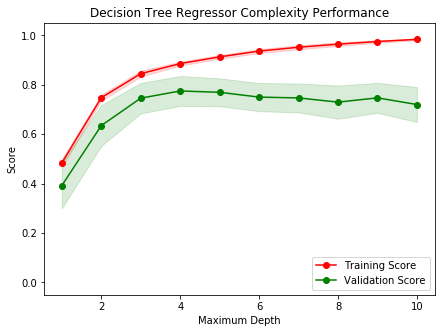

In [7]:
vs.ModelComplexity(X_train, y_train)

### 问题 5- 偏差与方差之间的权衡取舍
*当模型以最大深度 1训练时，模型的预测是出现很大的偏差还是出现了很大的方差？当模型以最大深度10训练时，情形又如何呢？图形中的哪些特征能够支持你的结论？*
  
**提示：** 你如何得知模型是否出现了偏差很大或者方差很大的问题？

**答案: **
由
当模型以最大深度1训练时，模型的预测是出现很大的偏差。因为最大深度为1的时候，学习曲线平分在0.5左右，因此此时的模型不能很好的代表整个训练集，训练值评分值也很小，因此偏差很大。
当模型以最大深度10训练时，模型的预测是出现很大的方差。因为此时的学习曲线平分在1.0左右，因此此时的模型能很好的代表整个训练集，但是测试数据的评分有点低，因此该模型可以代表训练数据，但是不能很好的代表测试数据，因此存在着很大的方差。




### 问题 6- 最优模型的猜测
*你认为最大深度是多少的模型能够最好地对未见过的数据进行预测？你得出这个答案的依据是什么？*

**答案: **
最大深度是4的时候模型能够最好的对未见过的数据进行预测。因为我们需要的模型不仅是训练得分很高，而且测试得分也要求很高。由上图可以看出最大深度是4的时候，测试评分最好，而且此时的训练评分也在0.9左右，能很好的代表训练模型和测试模型。

-----

## 评价模型表现
在这个项目的最后，你将自己建立模型，并使用最优化的`fit_model`函数，基于客户房子的特征来预测该房屋的价值。

### 问题 7- 网格搜索（Grid Search）
*什么是网格搜索法？如何用它来优化学习算法？*


**回答: **
网格是指不同参数不同取值交叉后形成的一个多维网格空间，网格搜索就是遍历由不同参数和不同取值交叉厚的多维网格空间，进行模型训练和验证，最终选择出效果最优的参数组合。
例如：不同参数a,b,c三种，a可以取值1,2，b可以取值3，4，c可以取值5,6，则有8中组合{[1,3,5],[1,3,6],[1,4,5],[1,4,6],[2,3,5],[2,3,6],[2,4,5],[2,4,6]},然后遍历8中情况下的参数组合，进行模型训练和验证，选择最优的参数组合。

### 问题 8- 交叉验证
*什么是K折交叉验证法（k-fold cross-validation）？优化模型时，使用这种方法对网格搜索有什么好处？网格搜索是如何结合交叉验证来完成对最佳参数组合的选择的？网格搜索时如果不使用交叉验证会有什么问题？GridSearchCV中的[`'cv_results'`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)属性能告诉我们什么？* 

**提示：** 在下面 fit_model函数最后加入 `print pd.DataFrame(grid.cv_results_)` 可以帮你查看更多。

**答案: **
K折交叉验证法:将数据集分为测试集和训练集，然后将训练集分为k个子集，每次取其中一个子集为测试集，其他k-1个作为训练集，然后按照训练集得出模型，使用测试集，对这个模型进行验证，得出分类率，然后计算k次分类率的平均值，作为模型的真实分类率。
网格搜索是根据模型的评分来计算好坏，而K折交叉验证则可以正确的计算出每个网格的真实分类率，使模型更准确。因为K折交叉验证可以通过一个数据集，对同一模型进行多次验证，考虑到了整个数据集，而不是只通过一部分的数据对模型进行训练和测试。网格搜索是模型验证，而使用K折交叉验证则可以更准确的验证每个模型的好坏。如果网格搜索不使用交叉验证，只凭一次验证来判断模型的好坏是不准确的。假如只进行一次验证，也许训练集刚好适合这个模型，但是对测试集不是很适合，就会使训练评分很高，但是测试评分很低。但是经过多次验证的话就完全降低了这种可能，每部分数据都可以考虑的到。通过GridSearchCV中的'cv_results'属性可以知道每次使用网格搜索对交叉验证的结果。知道每次网格搜索的训练得分和验证得分，已经得分与时间的平均值与方差，以及所有得分的排序。

### 练习：训练模型
在最后一个练习中，你将需要将所学到的内容整合，使用**决策树演算法**训练一个模型。为了保证你得出的是一个最优模型，你需要使用网格搜索法训练模型，以找到最佳的 `'max_depth'` 参数。你可以把`'max_depth'` 参数理解为决策树算法在做出预测前，允许其对数据提出问题的数量。决策树是**监督学习算法**中的一种。

此外，你会发现你的实现使用的是 `ShuffleSplit()` 。它也是交叉验证的一种方式（见变量 `'cv_sets'`）。虽然这不是**问题8**中描述的 K-Fold 交叉验证，这个教程验证方法也很有用！这里 `ShuffleSplit()` 会创造10个(`'n_splits'`)混洗过的集合，每个集合中20%(`'test_size'`)的数据会被用作**验证集**。当你在实现的时候，想一想这跟 K-Fold 交叉验证有哪些相同点，哪些不同点？

在下方 `fit_model` 函数中，你需要做的是：
- 使用  `sklearn.tree` 中的 [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) 创建一个决策树的回归函数；
  - 将这个回归函数储存到 `'regressor'` 变量中；
- 为 `'max_depth'` 创造一个字典，它的值是从1至10的数组，并储存到 `'params'` 变量中；
- 使用 `sklearn.metrics` 中的 [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)  创建一个评分函数；
  - 将 `performance_metric` 作为参数传至这个函数中；
  - 将评分函数储存到 `'scoring_fnc'` 变量中；
- 使用 `sklearn.model_selection` 中的 [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 创建一个网格搜索对象；
  - 将变量`'regressor'`, `'params'`, `'scoring_fnc'`, 和 `'cv_sets'` 作为参数传至这个对象中；
  - 将 `GridSearchCV` 存到 `'grid'` 变量中。
  
如果有同学对python函数如何传递多个参数不熟悉，可以参考这个MIT课程的[视频](http://cn-static.udacity.com/mlnd/videos/MIT600XXT114-V004200_DTH.mp4)。

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)
    #print(cv_sets)
    # TODO: Create a decision tree regressor object
    
    regressor = DecisionTreeRegressor(random_state=0)
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.array([i for i in range(1,11)])}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    print(grid.cv_results_)
    return grid.best_estimator_
fit_model(X_train, y_train)

{'split5_train_score': array([ 0.4863467 ,  0.75205738,  0.84905691,  0.88307761,  0.90622815,
        0.92907852,  0.94430805,  0.95957726,  0.97010586,  0.98160559]), 'split0_test_score': array([ 0.36576033,  0.59645571,  0.77496891,  0.81755616,  0.80695308,
        0.82166342,  0.80157003,  0.78370048,  0.73465264,  0.7228282 ]), 'split1_train_score': array([ 0.4616485 ,  0.75570034,  0.85201115,  0.89601718,  0.92557133,
        0.94762341,  0.96037566,  0.97016219,  0.98036414,  0.98772526]), 'mean_score_time': array([ 0.00030005,  0.0003    ,  0.00050004,  0.00020001,  0.00050004,
        0.00050001,  0.0003    ,  0.00030003,  0.00040002,  0.00010002]), 'split7_test_score': array([ 0.46408313,  0.69257854,  0.78261339,  0.80960764,  0.7549391 ,
        0.76737436,  0.78731286,  0.78783603,  0.76093596,  0.77851925]), 'mean_train_score': array([ 0.48383553,  0.74763896,  0.84498845,  0.88569321,  0.91297917,
        0.93630827,  0.95185855,  0.96440959,  0.97501921,  0.98381579])

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

### 做出预测
当我们用数据训练出一个模型，它现在就可用于对新的数据进行预测。在决策树回归函数中，模型已经学会对新输入的数据*提问*，并返回对**目标变量**的预测值。你可以用这个预测来获取数据未知目标变量的信息，这些数据必须是不包含在训练数据之内的。

### 问题 9- 最优模型
*最优模型的最大深度（maximum depth）是多少？此答案与你在**问题 6**所做的猜测是否相同？*

运行下方区域内的代码，将决策树回归函数代入训练数据的集合，以得到最优化的模型。

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

{'split5_train_score': array([ 0.4863467 ,  0.75205738,  0.84905691,  0.88307761,  0.90622815,
        0.92907852,  0.94430805,  0.95957726,  0.97010586,  0.98160559]), 'split0_test_score': array([ 0.36576033,  0.59645571,  0.77496891,  0.81755616,  0.80695308,
        0.82166342,  0.80157003,  0.78370048,  0.73465264,  0.7228282 ]), 'split1_train_score': array([ 0.4616485 ,  0.75570034,  0.85201115,  0.89601718,  0.92557133,
        0.94762341,  0.96037566,  0.97016219,  0.98036414,  0.98772526]), 'mean_score_time': array([ 0.00020001,  0.00060005,  0.0006    ,  0.00040002,  0.00040002,
        0.00040002,  0.00020001,  0.00050004,  0.0003    ,  0.00050001]), 'split7_test_score': array([ 0.46408313,  0.69257854,  0.78261339,  0.80960764,  0.7549391 ,
        0.76737436,  0.78731286,  0.78783603,  0.76093596,  0.77851925]), 'mean_train_score': array([ 0.48383553,  0.74763896,  0.84498845,  0.88569321,  0.91297917,
        0.93630827,  0.95185855,  0.96440959,  0.97501921,  0.98381579])

**Answer: **
最优模型的最大深度（maximum depth）是4。与在6之中的预测相同

### 问题 10 - 预测销售价格
想像你是一个在波士顿地区的房屋经纪人，并期待使用此模型以帮助你的客户评估他们想出售的房屋。你已经从你的三个客户收集到以下的资讯:

| 特征 | 客戶 1 | 客戶 2 | 客戶 3 |
| :---: | :---: | :---: | :---: |
| 房屋内房间总数 | 5 间房间 | 4 间房间 | 8 间房间 |
| 社区贫困指数（％被认为是贫困阶层） | 17% | 32% | 3% |
| 邻近学校的学生-老师比例 | 15：1 | 22：1 | 12：1 |

*你会建议每位客户的房屋销售的价格为多少？从房屋特征的数值判断，这样的价格合理吗？为什么？* 

**提示：**用你在**分析数据**部分计算出来的统计信息来帮助你证明你的答案。

运行下列的代码区域，使用你优化的模型来为每位客户的房屋价值做出预测。

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


**答案: **
客户1的房价是$404,600.00，客户2的是 $207,375.00，客户3的是$1,018,500.00。
从房屋特征的数值判断，这样的价格合理。对于房子来说，房间越多，房子面积要响应的增大，价格相对要高。 贫困指数，说明这个地区的低收入阶层较多，同时消费水平降低，该地区商业就相比落后，房子价格相对较低。 学生教师比例越大，证明该地区教育水平相对相对较高，房子价格也相应增加。

### 敏感度

一个最优的模型不一定是一个健壮模型。有的时候模型会过于复杂或者过于简单，以致于难以泛化新增添的数据；有的时候模型采用的学习算法并不适用于特定的数据结构；有的时候样本本身可能有太多噪点或样本过少，使得模型无法准确地预测目标变量。这些情况下我们会说模型是欠拟合的。执行下方区域中的代码，采用不同的训练和测试集执行 `fit_model` 函数10次。注意观察对一个特定的客户来说，预测是如何随训练数据的变化而变化的。

In [11]:
# 如果你在 fit_model 函数里使用了 print pd.DataFrame(grid.cv_results_) 请注释掉这行之后再运行本代码

vs.PredictTrials(features, prices, fit_model, client_data)

{'split5_train_score': array([ 0.4863467 ,  0.75205738,  0.84905691,  0.88307761,  0.90622815,
        0.92907852,  0.94430805,  0.95957726,  0.97010586,  0.98160559]), 'split0_test_score': array([ 0.36576033,  0.59645571,  0.77496891,  0.81755616,  0.80695308,
        0.82166342,  0.80157003,  0.78370048,  0.73465264,  0.7228282 ]), 'split1_train_score': array([ 0.4616485 ,  0.75570034,  0.85201115,  0.89601718,  0.92557133,
        0.94762341,  0.96037566,  0.97016219,  0.98036414,  0.98772526]), 'mean_score_time': array([  5.99956512e-04,   3.00025940e-04,   3.00025940e-04,
         9.99927521e-05,   2.00033188e-04,   2.00033188e-04,
         2.00009346e-04,   5.00035286e-04,   0.00000000e+00,
         1.00016594e-04]), 'split7_test_score': array([ 0.46408313,  0.69257854,  0.78261339,  0.80960764,  0.7549391 ,
        0.76737436,  0.78731286,  0.78783603,  0.76093596,  0.77851925]), 'mean_train_score': array([ 0.48383553,  0.74763896,  0.84498845,  0.88569321,  0.91297917,
        

{'split5_train_score': array([ 0.44876376,  0.72539773,  0.82152737,  0.87217694,  0.8996833 ,
        0.92802875,  0.95262778,  0.96824235,  0.97979357,  0.98883437]), 'split0_test_score': array([ 0.11853311,  0.42440539,  0.47377662,  0.50397694,  0.52017339,
        0.55034296,  0.54308302,  0.53385147,  0.50939199,  0.49500126]), 'split1_train_score': array([ 0.49641573,  0.76844959,  0.8430278 ,  0.90020274,  0.92299666,
        0.94526545,  0.96011233,  0.97414541,  0.9857555 ,  0.99067778]), 'mean_score_time': array([ 0.00039999,  0.00039999,  0.00040004,  0.00050004,  0.0003    ,
        0.00050006,  0.00029998,  0.00040002,  0.00020001,  0.00010002]), 'split7_test_score': array([ 0.37760285,  0.63560058,  0.76913488,  0.74031968,  0.72928932,
        0.71812497,  0.70820908,  0.6802941 ,  0.68769752,  0.64202365]), 'mean_train_score': array([ 0.46840773,  0.73830287,  0.83380563,  0.88201891,  0.9111096 ,
        0.93779053,  0.95619266,  0.97027436,  0.98094712,  0.98864421])

{'split5_train_score': array([ 0.44780126,  0.7055459 ,  0.79021458,  0.84842097,  0.88404133,
        0.91443802,  0.93758773,  0.95884127,  0.97552525,  0.98883838]), 'split0_test_score': array([ 0.43332206,  0.68221668,  0.75834909,  0.80327242,  0.74753939,
        0.76273104,  0.75055059,  0.67854062,  0.72172414,  0.67251267]), 'split1_train_score': array([ 0.46861019,  0.74076147,  0.82588299,  0.86313177,  0.88726402,
        0.91101736,  0.93518663,  0.96058421,  0.97308073,  0.98412531]), 'mean_score_time': array([  5.00059128e-04,   9.99927521e-05,   3.00025940e-04,
         5.00059128e-04,   2.00033188e-04,   4.00042534e-04,
         2.00033188e-04,   7.00044632e-04,   2.00009346e-04,
         1.00016594e-04]), 'split7_test_score': array([ 0.42532894,  0.64636583,  0.62220544,  0.67452588,  0.70236723,
        0.71609382,  0.67907451,  0.65679001,  0.60960872,  0.58188874]), 'mean_train_score': array([ 0.4714633 ,  0.73587111,  0.82300788,  0.86859863,  0.89713516,
        

{'split5_train_score': array([ 0.48645435,  0.73857166,  0.82798225,  0.87367214,  0.90599558,
        0.92960473,  0.95165354,  0.96787481,  0.97918662,  0.98776112]), 'split0_test_score': array([ 0.40729453,  0.73269857,  0.84326799,  0.87876857,  0.87799833,
        0.8705371 ,  0.87123238,  0.86289224,  0.83456685,  0.83406519]), 'split1_train_score': array([ 0.47866313,  0.74048729,  0.82875873,  0.87947491,  0.91499946,
        0.94262845,  0.95837936,  0.97190677,  0.98321102,  0.9895118 ]), 'mean_score_time': array([  4.00042534e-04,   3.00025940e-04,   5.00035286e-04,
         4.00018692e-04,   4.00066376e-04,   2.00009346e-04,
         9.99927521e-05,   3.00049782e-04,   1.00016594e-04,
         2.00009346e-04]), 'split7_test_score': array([ 0.39669372,  0.73210021,  0.83097896,  0.78319811,  0.77080585,
        0.78575257,  0.76847241,  0.74973645,  0.751278  ,  0.72393541]), 'mean_train_score': array([ 0.49258481,  0.74813691,  0.83378149,  0.88017917,  0.91346953,
        

{'split5_train_score': array([ 0.45279644,  0.72280136,  0.81205196,  0.86313603,  0.88986348,
        0.91805291,  0.93531653,  0.95506684,  0.96560382,  0.97861943]), 'split0_test_score': array([ 0.35723504,  0.6317365 ,  0.70119118,  0.67548344,  0.70593028,
        0.6424354 ,  0.59187128,  0.58315056,  0.60719051,  0.63805225]), 'split1_train_score': array([ 0.46910789,  0.73419592,  0.8319209 ,  0.87144647,  0.89722524,
        0.92710213,  0.94786251,  0.96385288,  0.97542456,  0.98402968]), 'mean_score_time': array([ 0.00040007,  0.0003    ,  0.00019999,  0.00020001,  0.00020001,
        0.00050006,  0.00060003,  0.00010002,  0.00080001,  0.00020001]), 'split7_test_score': array([ 0.52129318,  0.61064466,  0.76003329,  0.72854788,  0.74017077,
        0.75557542,  0.74732613,  0.72100365,  0.75157004,  0.72863374]), 'mean_train_score': array([ 0.4657324 ,  0.72768242,  0.8261401 ,  0.87418554,  0.90408136,
        0.92941287,  0.94810549,  0.96299288,  0.97399821,  0.98250373])

### 问题 11 - 实用性探讨
*简单地讨论一下你建构的模型能否在现实世界中使用？* 

**提示：** 回答几个问题，并给出相应结论的理由：
- *1978年所采集的数据，在今天是否仍然适用？*
- *数据中呈现的特征是否足够描述一个房屋？*
- *模型是否足够健壮来保证预测的一致性？你需要参考上面敏感度部分的结果来解释你的结论。*
- *在波士顿这样的大都市采集的数据，能否应用在其它乡镇地区？*

**答案: **
1978年所采集的数据，在今天不适用，因为存在着很多因素，如该地区的经济发展以及房价都对这些有影响。
数据中呈现的特征不能足够描述一个房屋，还应该考虑房子的朝向，装修情况等。
模型不能保证预测的一致性，有上边的敏感度结果可以看出房子价格并不稳定，最大的有420,622.22，最小的为351,577.61。还存在着很大的波动范围。
在波士顿这样的大都市采集的数据，不能应用在其它乡镇地区。因为其他地区的房价，经济发展水平都不一样，存在着很大的变数。

### 可选问题 - 预测北京房价

（本题结果不影响项目是否通过）通过上面的实践，相信你对机器学习的一些常用概念有了很好的领悟和掌握。但利用70年代的波士顿房价数据进行建模的确对我们来说意义不是太大。现在你可以把你上面所学应用到北京房价数据集中`bj_housing.csv`。

免责声明：考虑到北京房价受到宏观经济、政策调整等众多因素的直接影响，预测结果仅供参考。

这个数据集的特征有：
- Area：房屋面积，平方米
- Room：房间数，间
- Living: 厅数，间
- School: 是否为学区房，0或1
- Year: 房屋建造时间，年
- Floor: 房屋所处楼层，层

目标变量：
- Value: 房屋人民币售价，万

你可以参考上面学到的内容，拿这个数据集来练习数据分割与重排、定义衡量标准、训练模型、评价模型表现、使用网格搜索配合交叉验证对参数进行调优并选出最佳参数，比较两者的差别，最终得出最佳模型对验证集的预测分数。

In [12]:
### 你的代码
# filename_bj = r'C:\Users\Administrator\Desktop\data analysis\boston_housing-master\bj_housing.csv'
# data = pd.read_csv(filename_bj)

# prices_bj = data['Value']
# features_bj = data.drop('Value', axis = 1)
# #data.info()
# X_train, X_test, y_train, y_test = train_test_split(features_bj, prices_bj, test_size = 0.7, random_state=0)
# vs.ModelLearning(features_bj, prices_bj)
# vs.ModelComplexity(X_train, y_train)
# fit_model(X_train,y_train)

你成功的用新的数据集构建了模型了吗？他能对测试数据进行验证吗？它的表现是否符合你的预期？交叉验证是否有助于提升你模型的表现？

**答案：**

如果你是从零开始构建机器学习的代码会让你一时觉得无从下手。这时不要着急，你要做的只是查看之前写的代码，把每一行都看明白，然后逐步构建你的模型。当中遇到什么问题也可以在我们论坛寻找答案。也许你会发现你所构建的模型的表现并没有达到你的预期，这说明机器学习并非是一项简单的任务，构建一个表现良好的模型需要长时间的研究和测试。这也是我们接下来的课程中会逐渐学到的。